In [1]:
pip install numpy pandas matplotlib statsmodels scikit-learn


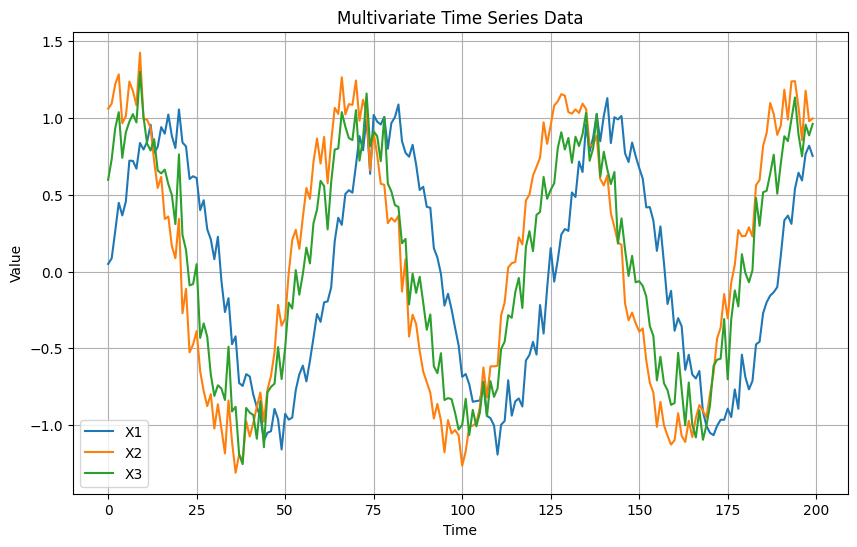

Lag Order Selection:
  VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -5.978      -5.916    0.002534      -5.953
1       -12.34      -12.09   4.395e-06      -12.24
2       -12.94      -12.51   2.398e-06      -12.77
3       -13.23     -12.62*   1.795e-06      -12.98
4       -13.27      -12.47   1.734e-06      -12.94
5       -13.40      -12.41   1.524e-06     -13.00*
6       -13.43      -12.26   1.482e-06      -12.95
7       -13.48      -12.12  1.416e-06*      -12.92
8       -13.44      -11.90   1.465e-06      -12.82
9      -13.48*      -11.75   1.425e-06      -12.78
10      -13.41      -11.50   1.538e-06      -12.63
11      -13.33      -11.23   1.672e-06      -12.48
12      -13.28      -11.00   1.762e-06      -12.36
13      -13.22      -10.75   1.903e-06      -12.21
14      -13.11      -10.46   2.139e-06      -12.03
15      -13.09      -10.25   2.221e-06      -11.93
---------

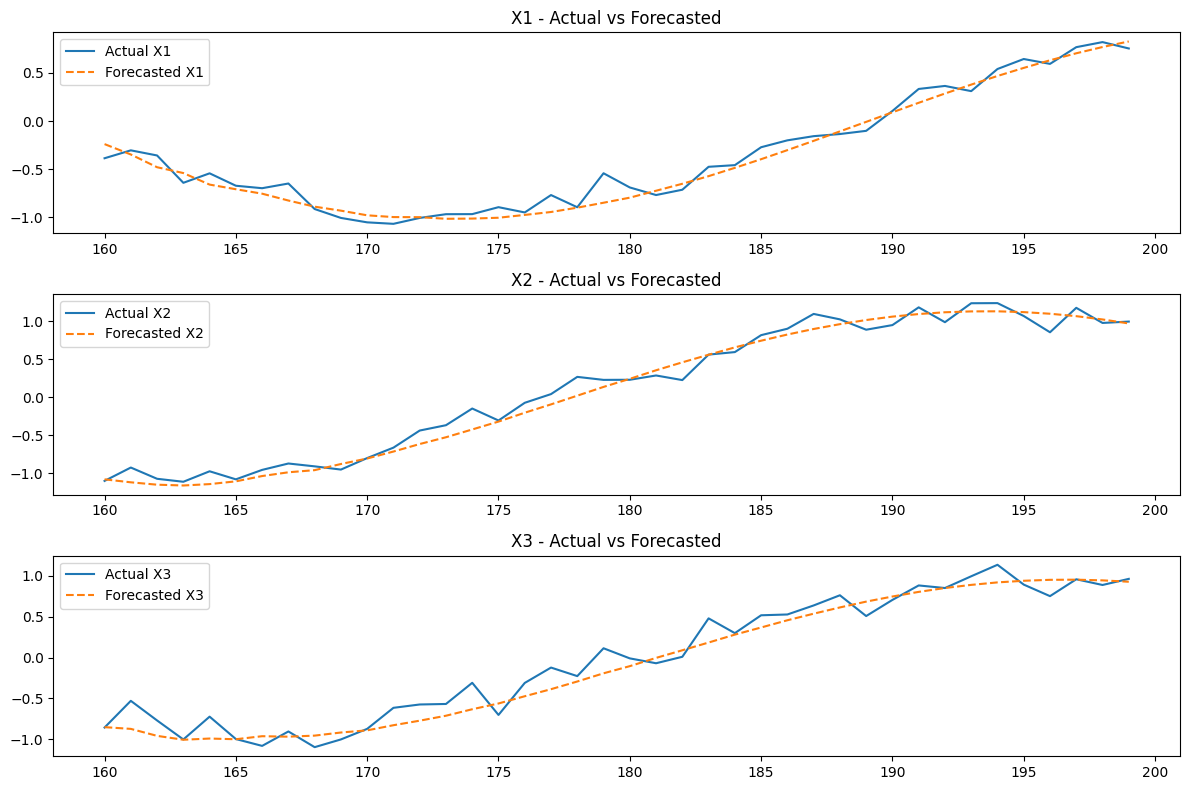

Mean Squared Error for X1: 0.0095
Mean Squared Error for X2: 0.0154
Mean Squared Error for X3: 0.0251


In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error

# -------------------------------
# Step 1: Generate Multivariate Time Series Data
# -------------------------------

np.random.seed(42)
n_obs = 200  # Number of observations

# Create three related time series using sine wave + noise + lag relations
t = np.arange(n_obs)
x1 = np.sin(0.1 * t) + np.random.normal(0, 0.1, n_obs)
x2 = 0.5 * x1 + np.cos(0.1 * t) + np.random.normal(0, 0.1, n_obs)
x3 = 0.3 * x1 + 0.7 * x2 + np.random.normal(0, 0.1, n_obs)

# Combine into DataFrame
df = pd.DataFrame({'X1': x1, 'X2': x2, 'X3': x3})

# Plot the data
df.plot(figsize=(10,6))
plt.title("Multivariate Time Series Data")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.show()

# -------------------------------
# Step 2: Train-Test Split
# -------------------------------

# Use 80% for training, 20% for testing
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# -------------------------------
# Step 3: Fit VAR Model
# -------------------------------

# Create and fit the model
model = VAR(train)

# Select optimal lag order based on AIC
lag_order = model.select_order(maxlags=15)
print("Lag Order Selection:\n", lag_order.summary())
best_lag = lag_order.aic

# Fit the model with the best lag
var_model = model.fit(best_lag)
print(var_model.summary())

# -------------------------------
# Step 4: Forecasting
# -------------------------------

# Number of steps to forecast
forecast_steps = len(test)

# Get forecast
forecast = var_model.forecast(train.values[-best_lag:], steps=forecast_steps)

# Convert to DataFrame
forecast_df = pd.DataFrame(forecast, index=test.index, columns=['X1_pred', 'X2_pred', 'X3_pred'])

# -------------------------------
# Step 5: Plotting Actual vs Predicted
# -------------------------------

plt.figure(figsize=(12, 8))
for i, col in enumerate(['X1', 'X2', 'X3']):
    plt.subplot(3, 1, i + 1)
    plt.plot(test.index, test[col], label='Actual ' + col)
    plt.plot(test.index, forecast_df[col + '_pred'], label='Forecasted ' + col, linestyle='--')
    plt.legend()
    plt.title(f'{col} - Actual vs Forecasted')
    plt.tight_layout()
plt.show()

# -------------------------------
# Step 6: Evaluation (MSE)
# -------------------------------

for col in ['X1', 'X2', 'X3']:
    mse = mean_squared_error(test[col], forecast_df[col + '_pred'])
    print(f'Mean Squared Error for {col}: {mse:.4f}')
